# Image classification of randomly rotated MNIST digits using a convolutional neural network

<b>Import libraries</b>

In [54]:
import cv2
import numpy 
# scipy.special for the sigmoid function: expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot 
# ensure the plots are inside this notebook, not an external window
%matplotlib inline
import PIL
import random
import array

<b> Task1</b>

<b> Task1:Rotation of digits by fixed angle using OpenCV library in one digit number case</b>

In [55]:
# Import the original data csv file

test_data_file = open("one.csv",'r')         # r means open the file to read (only)
test_data_list = test_data_file.readlines()     # read the file as lines / records
test_data_file.close()                         # always close the file

        Label =  7
<class 'numpy.ndarray'>


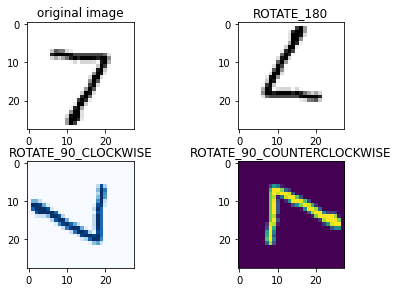

In [60]:
# read the data from the long list (test_data_list) convert the data into a 28 x 28 array, then plot


new_list=[]  #empty list
for record in test_data_list:                  # test_data_list is all the values in the test file
    all_values = record.split(',')             # split each record (image) into values seperated by commas
    correct_label = int(all_values[0])         # the first value is the lable
    inputs = (numpy.asfarray(all_values[1:]))    
    
    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
    
    #matplotlib.pyplot.imshow(image, cmap = 'Greys',interpolation='nearest') 
    #matplotlib.pyplot.get_cmap('Blues')        #different color
    #matplotlib.pyplot.figure(count)             # make a figure out of the array
    #matplotlib.pyplot.show()                    # show the current image


    print("        Label = ",correct_label)
    image2= cv2.rotate(image, cv2.ROTATE_180)    #rotate the image by fix value of angle
    #matplotlib.pyplot.imshow(image2)            #show the modified image
    #other options
    rotate_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)   
    rotate_90_counter = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) 
       

    #subplot(r,c) provide the no. of rows and columns
    fig, axs = matplotlib.pyplot .subplots(2,2) 
    #set spaces autonomically between plots
    fig.tight_layout()
    # use the created array to output your multiple images. 
    axs[0, 0].imshow(image,cmap = 'Greys',interpolation='nearest')
    axs[0, 0].set_title('original image')
    axs[0, 1].imshow(image2,cmap = 'Greys',interpolation='nearest')
    axs[0, 1].set_title('ROTATE_180')
    axs[1, 0].imshow(rotate_90,cmap = matplotlib.pyplot.get_cmap('Blues'),interpolation='nearest')
    axs[1, 0].set_title('ROTATE_90_CLOCKWISE')
    axs[1, 1].imshow(rotate_90_counter)
    axs[1, 1].set_title('ROTATE_90_COUNTERCLOCKWISE')
  

    
    #save the rotated image
    #matplotlib.pyplot.imsave("{}.png".format(count),image2)

    #convert to array with type of integer
    n1=numpy.asarray(image,dtype=int)
    n2=numpy.asarray(image2,dtype=int)
    n3=numpy.asarray(rotate_90,dtype=int)
    n4=numpy.asarray(rotate_90_counter,dtype=int)
     
    #convert to one dimension
    new1=n1.flatten()
    new2=n2.flatten()
    new3=n3.flatten()
    new4=n4.flatten()
    #combine label with 784 pixel values
    new1= numpy.concatenate(([correct_label],new1))
    new2= numpy.concatenate(([correct_label],new2))
    new3= numpy.concatenate(([correct_label],new3))
    new4= numpy.concatenate(([correct_label],new4))

    #append the list of pixels values to the empty list
    new_list.append(new1)
    new_list.append(new2)
    new_list.append(new3)
    new_list.append(new4)

   

    print(type(image))   
#save the four rows of pixel values into a new csv file
numpy.savetxt("one_task1.csv", new_list,delimiter=',', fmt='%d',newline='\n')    

<b>Task1:Rotation of digits by fixed angle using OpenCV library in multiple digits case</b>

In [64]:
# Import the original data csv file

test_data_file = open("mnist_test.csv",'r')         # r means open the file to read (only)
test_data_list = test_data_file.readlines()     # read the file as lines / records
test_data_file.close()                         # always close the file

In [65]:
# read the data from the long list (test_data_list) convert the data into a 28 x 28 array, then plot

count =0        # this loop counter is to display the images as the loop reads / creates them
new_list=[]  #empty list
for record in test_data_list:                  # test_data_list is all the values in the test file
    all_values = record.split(',')             # split each record (image) into values seperated by commas
    correct_label = int(all_values[0])         # the first value is the lable
    inputs = (numpy.asfarray(all_values[1:]))    
    
    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
    
    #matplotlib.pyplot.imshow(image, cmap = 'Greys',interpolation='nearest') 
    #matplotlib.pyplot.get_cmap('Blues')        #different color
    #matplotlib.pyplot.figure(count)             # make a figure out of the array
    #matplotlib.pyplot.show()                    # show the current image


    #print("        Label = ",correct_label)
    image2= cv2.rotate(image, cv2.ROTATE_180)    #rotate the image by fix value of angle
    #matplotlib.pyplot.imshow(image2)            #show the modified image
    #other options
    #rotate_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)   
    #rotate_90_counter = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) 
       
    
    #save the rotated image
    #matplotlib.pyplot.imsave("{}.png".format(count),image2)

    #convert to array with type of integer
    n1=numpy.asarray(image2,dtype=int)

    #convert to one dimension
    new1=n1.flatten()

    #combine label with 784 pixel values
    new1= numpy.concatenate(([correct_label],new1))


    #append the list of pixels values to the empty list
    new_list.append(new1)

    count = count+1                             # increment the counter

print("the count is",count)     
#save the four rows of pixel values into a new csv file
numpy.savetxt("mnist_test_task1.csv", new_list,delimiter=',', fmt='%d',newline='\n') 

the count is 10000


<b>Task1:Traning and testing with convolutional neural netwrok</b>

In [126]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2
import cv2
import numpy 
# scipy.special for the sigmoid function: expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot 
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [127]:
# neural network class definition
class neuralNetwork:
    
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        #for ReLU function
        #self.activation_function = lambda x : numpy.maximum(0,x) 
# train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
# query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [128]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the new mnist train data CSV file into a list
training_data_file = open("mnist_train_task1.csv", 'r')
training_data_list =  training_data_file.readlines()
training_data_file.close()

# load the new mnist test data CSV file into a list
test_data_file = open("mnist_test_task1.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


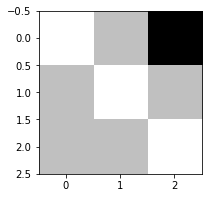

In [129]:
# I 
kernel = [[1,0,-3],[0,1,0],[0,0,1]]  

matplotlib.rcParams['figure.figsize'] = 3, 3
matplotlib.pyplot.imshow(kernel, cmap = matplotlib.pyplot.get_cmap('gray'))

In [130]:
# train the neural network

epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        
        
#convolve images    
        image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array 
        #padding
        impad = numpy.pad(image, pad_width=1, mode='constant', constant_values=0)
   
        matplotlib.rcParams['figure.figsize'] = 5,5
        conv_image = numpy.ones((30,30))

# make a subarray and convolve it with the kernel
        step = 3
        i=0
        while i < 27:
            i+=1
            j = 0
            while j < 27 :
                sub_image = impad[i:(i+step),j:(j+step):]    # array[starty : endy , start x : end x : step]
                sub_image = numpy.reshape(sub_image,(1,(step ** 2)))
                kernel = numpy.reshape(kernel, ((step ** 2),1))
                conv_scalar = numpy.dot(sub_image,kernel)
                conv_image[i,j] = conv_scalar
                j+=1
            pass
        pass
        
        
        
        
        
        
        
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# test the neural network

scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    

    


#convolve images    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
    

    
    #padding
    impad = numpy.pad(image, pad_width=1, mode='constant', constant_values=0)    
    
    matplotlib.rcParams['figure.figsize'] = 5,5
    conv_image = numpy.ones((30,30))

# make a subarray and convolve it with the kernel
    step = 3
    i=0
    while i < 27:
        i+=1
        j = 0
        while j < 27 :
            sub_image = impad[i:(i+step),j:(j+step):]    # array[starty : endy , start x : end x : step]
            sub_image = numpy.reshape(sub_image,(1,(step ** 2)))
            kernel = numpy.reshape(kernel, ((step ** 2),1))
            conv_scalar = numpy.dot(sub_image,kernel)
            conv_image[i,j] = conv_scalar
            j+=1
        pass
    pass

   
    # query the network
    outputs = n.query(inputs)
    
    
    
    label = numpy.argmax(outputs)
    # append correct or incorrect to list 
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() * 100 / scorecard_array.size)

performance =  90.77


<b>Results</b>

<b>Test result for task1 with multiple digits dataset</b>

<p>rotated image for both train and test data, cnn performance is 90.77, lr=0.01,hd=200 </p>
<p>rotated image for both train and test data, cnn performance is 94.35, lr=0.05,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 94.67, lr=0.06,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 95.07, lr=0.07,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 94.84, lr=0.08,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 95.41, lr=0.085,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 95.62, lr=0.09,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 95.53, lr=0.1,hd=200</p>


<b>Task2</b>

<b>Task2:Rotation of digits by random angle using OpenCV library in one digit case</b>

In [80]:
# Import the original data csv file

test_data_file = open("one.csv",'r')         # r means open the file to read (only)
test_data_list = test_data_file.readlines()     # read the file as lines / records
test_data_file.close()                         # always close the file

The rotation number is:266


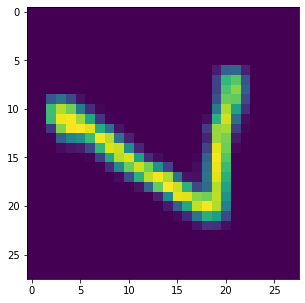

In [83]:
# read the data from the long list (test_data_list) convert the data into a 28 x 28 array, then plot


task2=[]
for record in test_data_list:                  # test_data_list is all the values in the test file
    all_values = record.split(',')             # split each record (image) into values seperated by commas
    correct_label = int(all_values[0])         # the first value is the lable
    inputs = (numpy.asfarray(all_values[1:]))    
    
    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
    

    #random positive number for anticlockwise rotation
    num1=random.randrange(0,360)
    # grab the dimensions of the image
    (h, w) = image.shape[:2]
    #calculate the center of the image
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by random degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), num1, 1.0)
    image2 = cv2.warpAffine(image, M, (w, h))
    
    #matplotlib.pyplot.imshow(image, cmap = 'Greys',interpolation='nearest') 
    #matplotlib.pyplot.get_cmap('Blues')
    #matplotlib.pyplot.figure(count)             # make a figure out of the array
    #print("        Label = ",correct_label)
    #matplotlib.pyplot.show()                    # show the current image   
    
    
    #save the rotated image
    #matplotlib.pyplot.imsave("{}.png".format(count),image2)
    
    #print the value of rotation angel
    print('The rotation number is:' + str(num1))
    
    
    matplotlib.pyplot.imshow(image2)
    

    #flatten the array and concatenate the label to the list of pixel values
    new=numpy.asarray(image2,dtype=int)
    new2=new.flatten()
    new3= numpy.concatenate(([correct_label],new2))
    #append the pixel values to the empty list
    task2.append(new3)

    
    


numpy.savetxt("one_task2.csv", task2,delimiter=',', fmt='%d',newline='\n')  

<b>Task2:Rotation of digits by random angle using OpenCV library in multiple digits</b>

In [ ]:
# read the data from the long list (test_data_list) convert the data into a 28 x 28 array, then plot


count =0        # this loop counter is to display the images as the loop reads / creates them
task2=[]
for record in test_data_list:                  # test_data_list is all the values in the test file
    all_values = record.split(',')             # split each record (image) into values seperated by commas
    correct_label = int(all_values[0])         # the first value is the lable
    inputs = (numpy.asfarray(all_values[1:]))    
    
    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
    

    #random positive number for anticlockwise rotation
    num1=random.randrange(0,360)
    # grab the dimensions of the image
    (h, w) = image.shape[:2]
    #calculate the center of the image
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by random degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), num1, 1.0)
    image2 = cv2.warpAffine(image, M, (w, h))
    
    #matplotlib.pyplot.imshow(image, cmap = 'Greys',interpolation='nearest') 
    #matplotlib.pyplot.get_cmap('Blues')
    #matplotlib.pyplot.figure(count)             # make a figure out of the array
    #print("        Label = ",correct_label)
    #matplotlib.pyplot.show()                    # show the current image   
    
    
    #save the rotated image
    #matplotlib.pyplot.imsave("{}.png".format(count),image2)
    
    #print the value of rotation angel
    #print('The rotation number is:' + str(num1))
    
    
    #matplotlib.pyplot.imshow(image2)
    

    #flatten the array and concatenate the label to the list of pixel values
    new=numpy.asarray(image2,dtype=int)
    new2=new.flatten()
    new3= numpy.concatenate(([correct_label],new2))
    #append the pixel values to the empty list
    task2.append(new3)

    
    
    count = count+1                             # increment the counter
        
print("the count is",count)
numpy.savetxt("mnist_train_task2.csv", task2,delimiter=',', fmt='%d',newline='\n')    


<b>Task2:Training and testing with convolutional neural network</b>

In [127]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2
import cv2
import numpy 
# scipy.special for the sigmoid function: expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot 
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [128]:
# neural network class definition
class neuralNetwork:
    
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        #for ReLU function
        #self.activation_function = lambda x : numpy.maximum(0,x) 
# train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
# query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [129]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.085

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the new mnist train data CSV file into a list
training_data_file = open("mnist_train_task2.csv", 'r')
training_data_list =  training_data_file.readlines()
training_data_file.close()


# load the new mnist test data CSV file into a list
test_data_file = open("mnist_test_task2.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


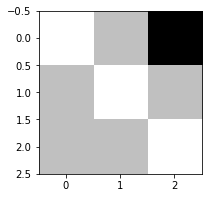

In [130]:
# I 
kernel = [[1,0,-3],[0,1,0],[0,0,1]]  

matplotlib.rcParams['figure.figsize'] = 3, 3
matplotlib.pyplot.imshow(kernel, cmap = matplotlib.pyplot.get_cmap('gray'))

In [131]:
# train the neural network

epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        
        
#convolve images    
        image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
   
        impad = numpy.pad(image, pad_width=1, mode='constant', constant_values=0)
       
        matplotlib.rcParams['figure.figsize'] = 5,5
        conv_image = numpy.ones((30,30))

# make a subarray and convolve it with the kernel
        step = 3
        i=0
        while i < 27:
            i+=1
            j = 0
            while j < 27 :
                sub_image = impad[i:(i+step),j:(j+step):]    # array[starty : endy , start x : end x : step]
                sub_image = numpy.reshape(sub_image,(1,(step ** 2)))
                kernel = numpy.reshape(kernel, ((step ** 2),1))
                conv_scalar = numpy.dot(sub_image,kernel)
                conv_image[i,j] = conv_scalar
                j+=1
            pass
        pass
        
        
        
        
        
        
        
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# test the neural network

scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    

    


#convolve images    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
       
    #padding
    impad = numpy.pad(image, pad_width=1, mode='constant', constant_values=0)    
    
    matplotlib.rcParams['figure.figsize'] = 5,5
    conv_image = numpy.ones((30,30))

# make a subarray and convolve it with the kernel
    step = 3
    i=0
    while i < 27:
        i+=1
        j = 0
        while j < 27 :
            sub_image = impad[i:(i+step),j:(j+step):]    # array[starty : endy , start x : end x : step]
            sub_image = numpy.reshape(sub_image,(1,(step ** 2)))
            kernel = numpy.reshape(kernel, ((step ** 2),1))
            conv_scalar = numpy.dot(sub_image,kernel)
            conv_image[i,j] = conv_scalar
            j+=1
        pass
    pass

   
    # query the network
    outputs = n.query(inputs)
    
    
    # Note that this array, outputs, is the 10 output nodes of the NW for each trial
    # This is wehre you need to chnage the code below to build the confusion matrix
    
    
    label = numpy.argmax(outputs)
    # append correct or incorrect to list 
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() * 100 / scorecard_array.size)

performance =  76.83


<b>Result</b>

<b>Test result for task2 with multiple digits dataset</b>

<p>rotated image for both train and test data, cnn performance is 46.98, lr=0.01,hd=200 </p>
<p>rotated image for both train and test data, cnn performance is 74.04, lr=0.05,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 75.97, lr=0.06,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 76.29, lr=0.07,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 77.7, lr=0.08,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 78.29, lr=0.085,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 77.35, lr=0.09,hd=200</p>
<p>rotated image for both train and test data, cnn performance is 76.83, lr=0.1,hd=200</p>


<b>Data analysis</b>

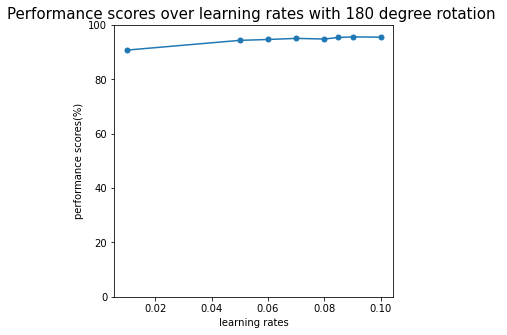

In [131]:
#for task1 multiple digits
import matplotlib.pyplot as plt
# initializing the data
x = [0.01,0.05,0.06,0.07,0.08,0.085,0.09,0.1]
y = [90.77,94.35,94.67,95.07,94.84,95.41,95.62,95.53]

# plotting the data
plt.plot(x, y,marker='o',
         markersize=5)

# Adding title to the plot
plt.title("Performance scores over learning rates with 180 degree rotation ",fontsize=15, color="black")

# Adding label on the y-axis
plt.ylabel('performance scores(%)')
 
# Adding label on the x-axis
plt.xlabel('learning rates')

# Setting the limit of y-axis
plt.ylim(0, 100)

plt.show()

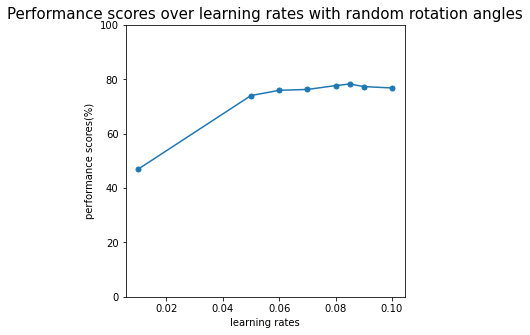

In [105]:
#for task2 multiple digits
import matplotlib.pyplot as plt
# initializing the data
x = [0.01,0.05,0.06,0.07,0.08,0.085,0.09,0.1]
y = [46.98,74.04,75.97,76.29,77.7,78.29,77.35,76.83]

# plotting the data
plt.plot(x, y,marker='o',
         markersize=5)

# Adding title to the plot
plt.title("Performance scores over learning rates with random rotation angles",fontsize=15, color="black")

# Adding label on the y-axis
plt.ylabel('performance scores(%)')
 
# Adding label on the x-axis
plt.xlabel('learning rates')

# Setting the limit of y-axis
plt.ylim(0, 100)

plt.show()

<b>Discussion</b>

<b>Compare performance score between convolutional and non-colulutional neural network by using task1 dataset</b>
<p>learning rate=0.09</p>

In [132]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2
import cv2
import numpy 
# scipy.special for the sigmoid function: expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot 
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
# initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        #for ReLU function
        #self.activation_function = lambda x : numpy.maximum(0,x) 
# train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
# query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [133]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.09

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the new mnist train data CSV file into a list
training_data_file = open("mnist_train_task1.csv", 'r')
training_data_list =  training_data_file.readlines()
training_data_file.close()

# load the new mnist test data CSV file into a list
test_data_file = open("mnist_test_task1.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [134]:
# train the neural network

epochs = 1

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# test the neural network

scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    
    # query the network
    outputs = n.query(inputs)
    
    
    
    label = numpy.argmax(outputs)
    # append correct or incorrect to list 
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() * 100 / scorecard_array.size)

performance =  95.41


The performance score is 95.41 for non-convolultional neural network above.